In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from google.colab.patches import cv2_imshow as sh
from skimage import measure, color, io
import glob

In [ ]:
fractographs  = glob.glob('/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/*.*')
fractographs.sort()

In [ ]:
fractographs

['/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image20.png',
 '/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image21.png',
 '/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image22.png',
 '/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image23.png',
 '/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image24.png',
 '/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image25.png',
 '/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image26.png',
 '/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image27.png',
 '/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image28.png',
 '/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image29.png',
 '/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image30.png',
 '/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image31.png',
 '/content/drive/MyDrive/BTP

In [ ]:
#load the activations from each network for different patch sizes

VGG16_160_activ = np.load('/content/drive/MyDrive/BTP/activations-VGG16-160.npy')
VGG16_320_activ = np.load('/content/drive/MyDrive/BTP/activations-VGG16-320.npy')

VGG19_160_activ = np.load('/content/drive/MyDrive/BTP/activations-VGG19-160.npy')
VGG19_320_activ = np.load('/content/drive/MyDrive/BTP/activations-VGG19-320.npy')

ResNet152_160_activ = np.load('/content/drive/MyDrive/BTP/activations-ResNet152-160.npy')
ResNet152_320_activ = np.load('/content/drive/MyDrive/BTP/activations-ResNet152-320.npy')

InceptionV3_160_activ = np.load('/content/drive/MyDrive/BTP/activations-InceptionV3-160.npy')
InceptionV3_320_activ = np.load('/content/drive/MyDrive/BTP/activations-InceptionV3-320.npy')

DenseNet201_160_activ = np.load('/content/drive/MyDrive/BTP/activations-DenseNet201-160.npy')
DenseNet201_320_activ = np.load('/content/drive/MyDrive/BTP/activations-DenseNet201-320.npy')

In [ ]:
image_idx = 22
iter = 50
mul_param = 0.35
conc_thresh = 0.25
area_thresh = 8000

In [ ]:
name, ext = fractographs[image_idx].split('/')[-1].split('.')
fractographs[image_idx]

'/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image42.png'

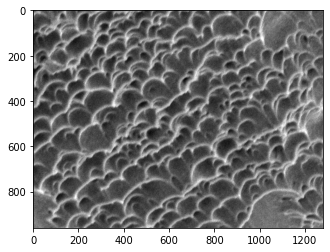

In [ ]:
img = cv2.imread(fractographs[image_idx], 0)
plt.imshow(img, cmap='gray')

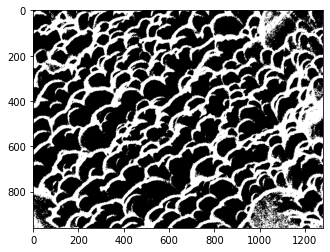

In [ ]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

In [ ]:
kernel = np.ones((1, 1), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=iter)
opening = (np.logical_not(opening)).astype(np.uint8)

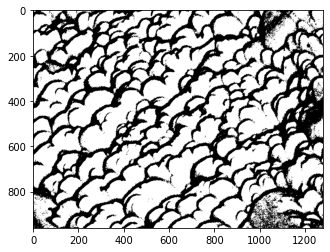

In [ ]:
plt.imshow(opening, cmap='gray')

In [ ]:
sure_bg = cv2.dilate(opening, kernel, iterations=iter)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
ret2, sure_fg = cv2.threshold(dist_transform, mul_param*dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)
unknown = cv2.subtract(sure_bg, sure_fg)

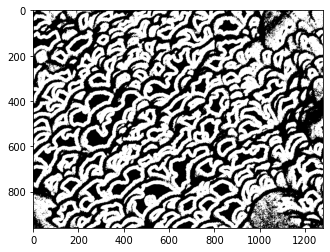

In [ ]:
plt.imshow(unknown, cmap='gray')

In [ ]:
ret3, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers[unknown==1] = 0

In [ ]:
np.unique(markers).shape

(189,)

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(img, np.int32(markers))
img2 = color.label2rgb(markers, bg_label=10)

In [ ]:
np.unique(markers).shape

(186,)

<Figure size 432x576 with 0 Axes>

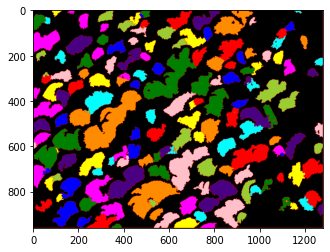

<Figure size 432x576 with 0 Axes>

In [ ]:
plt.imshow(img2, cmap='jet')
plt.figure(figsize=(6, 8))

In [ ]:
skeleton_img = np.zeros(img.shape, dtype=np.uint8)
skeleton_img[markers == -1] = [255, 255, 255]

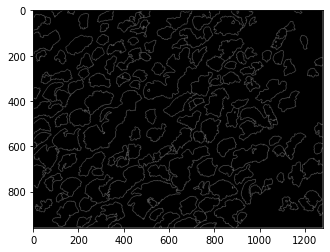

<Figure size 432x576 with 0 Axes>

In [ ]:
plt.imshow(skeleton_img)
plt.figure(figsize=(6, 8))
plt.show()

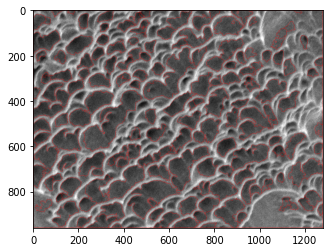

<Figure size 432x576 with 0 Axes>

In [ ]:
img[markers == -1] = [255, 0, 0]
plt.imshow(img)
plt.figure(figsize=(6, 8))
plt.show()

In [ ]:
x = np.unique(markers)
x

array([ -1,   0,  10,  11,  12,  13,  15,  16,  17,  18,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

In [ ]:
# add code to update np.unique(markers)
valid_uniq_markers = np.delete(x, np.where(x <= 0))
valid_uniq_markers

array([ 10,  11,  12,  13,  15,  16,  17,  18,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 19

In [ ]:
props = measure.regionprops_table(markers, intensity_image=img, properties=['area', 'equivalent_diameter', 
                                                                            'mean_intensity', 'orientation', 
                                                                            'perimeter', 'max_intensity' ,
                                                                            'min_intensity', 'major_axis_length',
                                                                            'minor_axis_length'])


props['concavity'] = props['perimeter']/props['area']
props['marker num'] = valid_uniq_markers[0:]
df = pd.DataFrame(props)

df.drop(df.index[(df['marker num'] == 10)], axis=0, inplace=True)
df.drop('mean_intensity-1', axis=1, inplace=True)
df.drop('mean_intensity-2', axis=1, inplace=True)
df.drop('max_intensity-1', axis=1, inplace=True)
df.drop('max_intensity-2', axis=1, inplace=True)
df.drop('min_intensity-1', axis=1, inplace=True)
df.drop('min_intensity-2', axis=1, inplace=True)


In [ ]:
df

,area,equivalent_diameter,mean_intensity-0,orientation,perimeter,max_intensity-0,min_intensity-0,major_axis_length,minor_axis_length,concavity,marker num
1,648,28.723844,80.836420,-1.253000,137.775649,115,43,41.142632,25.852384,0.212617,11
2,342,20.867389,80.181287,1.498574,103.976659,110,50,30.034735,16.907430,0.304025,12
3,964,35.034311,63.024896,1.297141,152.953319,108,25,39.964563,33.485527,0.158665,13
4,1038,36.354128,72.942197,-1.096501,160.882251,110,43,49.042938,31.678520,0.154993,15
5,2764,59.323133,81.939942,1.235116,408.960461,114,44,85.134802,63.849064,0.147960,16
...,...,...,...,...,...,...,...,...,...,...,...
179,4144,72.638176,69.813465,-1.279733,421.232539,115,32,113.083583,55.481008,0.101649,191
180,1664,46.029019,69.373798,-1.067999,233.871104,108,36,65.750613,36.651962,0.140548,192
181,3401,65.804921,69.565716,-1.452130,318.628463,112,31,106.262101,42.873203,0.093687,193
182,1056,36.667983,79.820076,-1.434093,181.225397,106,45,67.456013,21.438550,0.171615,194


In [ ]:
# Network - 1
VGG16_160_imgactiv = VGG16_160_activ[image_idx]
VGG16_320_imgactiv = VGG16_320_activ[image_idx]

# Network - 2
VGG19_160_imgactiv = VGG16_160_activ[image_idx]
VGG19_320_imgactiv = VGG16_320_activ[image_idx]

# Network - 3
ResNet152_160_imgactiv = ResNet152_160_activ[image_idx]
ResNet152_320_imgactiv = ResNet152_320_activ[image_idx]

# Network - 4
InceptionV3_160_imgactiv = InceptionV3_160_activ[image_idx]
InceptionV3_320_imgactiv = InceptionV3_320_activ[image_idx]

# Network - 5
DenseNet201_160_imgactiv = DenseNet201_160_activ[image_idx]
DenseNet201_320_imgactiv = DenseNet201_320_activ[image_idx]

In [ ]:
valid_uniq_markers

array([ 10,  11,  12,  13,  15,  16,  17,  18,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 19

In [ ]:
VGG16_160_mean = []
VGG16_160_var = []

VGG16_320_mean = []
VGG16_320_var = []

VGG19_160_mean = []
VGG19_160_var = []

VGG19_320_mean = []
VGG19_320_var = []

ResNet152_160_mean = []
ResNet152_160_var = []

ResNet152_320_mean = []
ResNet152_320_var = []

DenseNet201_160_mean = []
DenseNet201_160_var = []

DenseNet201_320_mean = []
DenseNet201_320_var = []

InceptionV3_160_mean = []
InceptionV3_160_var = []

InceptionV3_320_mean = []
InceptionV3_320_var = []

# remove all non positive values from np.unique(markers) then start from index 1.
for marker_num in valid_uniq_markers[1:]:
    VGG16_160_mean.append(np.mean(VGG16_160_imgactiv[markers == marker_num]))
    VGG16_160_var.append(np.std(VGG16_160_imgactiv[markers == marker_num])**2)

    VGG16_320_mean.append(np.mean(VGG16_320_imgactiv[markers == marker_num]))
    VGG16_320_var.append(np.std(VGG16_320_imgactiv[markers == marker_num])**2)

    VGG19_160_mean.append(np.mean(VGG19_160_imgactiv[markers == marker_num]))
    VGG19_160_var.append(np.std(VGG19_160_imgactiv[markers == marker_num])**2)

    VGG19_320_mean.append(np.mean(VGG19_320_imgactiv[markers == marker_num]))
    VGG19_320_var.append(np.std(VGG19_320_imgactiv[markers == marker_num])**2)

    ResNet152_160_mean.append(np.mean(ResNet152_160_imgactiv[markers == marker_num]))
    ResNet152_160_var.append(np.std(ResNet152_160_imgactiv[markers == marker_num])**2)

    ResNet152_320_mean.append(np.mean(ResNet152_320_imgactiv[markers == marker_num]))
    ResNet152_320_var.append(np.std(ResNet152_320_imgactiv[markers == marker_num])**2)

    InceptionV3_160_mean.append(np.mean(InceptionV3_160_imgactiv[markers == marker_num]))
    InceptionV3_160_var.append(np.std(InceptionV3_160_imgactiv[markers == marker_num])**2)

    InceptionV3_320_mean.append(np.mean(InceptionV3_320_imgactiv[markers == marker_num]))
    InceptionV3_320_var.append(np.std(InceptionV3_320_imgactiv[markers == marker_num])**2)

    DenseNet201_160_mean.append(np.mean(DenseNet201_160_imgactiv[markers == marker_num]))
    DenseNet201_160_var.append(np.std(DenseNet201_160_imgactiv[markers == marker_num])**2)

    DenseNet201_320_mean.append(np.mean(DenseNet201_320_imgactiv[markers == marker_num]))
    DenseNet201_320_var.append(np.std(DenseNet201_320_imgactiv[markers == marker_num])**2)


df['VGG16_160_mean'] = np.asarray(VGG16_160_mean)
df['VGG16_160_var'] = np.asarray(VGG16_160_var)

df['VGG16_320_mean'] = np.asarray(VGG16_320_mean)
df['VGG16_320_var'] = np.asarray(VGG16_320_var)

df['VGG19_160_mean'] = np.asarray(VGG19_160_mean)
df['VGG19_160_var'] = np.asarray(VGG19_160_var)

df['VGG19_320_mean'] = np.asarray(VGG19_320_mean)
df['VGG19_320_var'] = np.asarray(VGG19_320_var)

df['ResNet152_160_mean'] = np.asarray(ResNet152_160_mean)
df['ResNet152_160_var'] = np.asarray(ResNet152_160_var)

df['ResNet152_320_mean'] = np.asarray(ResNet152_320_mean)
df['ResNet152_320_var'] = np.asarray(ResNet152_320_var)

df['InceptionV3_160_mean'] = np.asarray(InceptionV3_160_mean)
df['InceptionV3_160_var'] = np.asarray(InceptionV3_160_var)

df['InceptionV3_320_mean'] = np.asarray(InceptionV3_320_mean)
df['InceptionV3_320_var'] = np.asarray(InceptionV3_320_var)

df['DenseNet201_160_mean'] = np.asarray(DenseNet201_160_mean)
df['DenseNet201_160_var'] = np.asarray(DenseNet201_160_var)

df['DenseNet201_320_mean'] = np.asarray(DenseNet201_320_mean)
df['DenseNet201_320_var'] = np.asarray(DenseNet201_320_var)


In [ ]:
df

,area,equivalent_diameter,mean_intensity-0,orientation,perimeter,max_intensity-0,min_intensity-0,major_axis_length,minor_axis_length,concavity,...,ResNet152_320_mean,ResNet152_320_var,InceptionV3_160_mean,InceptionV3_160_var,InceptionV3_320_mean,InceptionV3_320_var,DenseNet201_160_mean,DenseNet201_160_var,DenseNet201_320_mean,DenseNet201_320_var
1,648,28.723844,80.836420,-1.253000,137.775649,115,43,41.142632,25.852384,0.212617,...,15.011798,5.836187,27.465602,4.330046,5.143257,0.075482,11.772095,0.766149,7.408242,0.397562
2,342,20.867389,80.181287,1.498574,103.976659,110,50,30.034735,16.907430,0.304025,...,26.591949,1.094053,37.277075,13.082882,5.071272,0.045177,7.623613,3.103708,8.465088,0.261823
3,964,35.034311,63.024896,1.297141,152.953319,108,25,39.964563,33.485527,0.158665,...,12.883651,2.913057,29.934190,6.125023,7.839539,0.394314,6.073049,1.809406,6.591438,0.699225
4,1038,36.354128,72.942197,-1.096501,160.882251,110,43,49.042938,31.678520,0.154993,...,9.799105,1.336981,38.177765,25.421113,10.182240,0.833182,8.394682,0.259655,7.186593,0.072373
5,2764,59.323133,81.939942,1.235116,408.960461,114,44,85.134802,63.849064,0.147960,...,9.494663,6.663058,36.651214,31.009249,10.932244,7.205410,6.490096,1.939286,5.450367,0.864699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,4144,72.638176,69.813465,-1.279733,421.232539,115,32,113.083583,55.481008,0.101649,...,14.390427,9.255333,48.268649,32.331260,9.010192,0.457557,9.328161,3.238487,6.157896,2.166839
180,1664,46.029019,69.373798,-1.067999,233.871104,108,36,65.750613,36.651962,0.140548,...,16.527083,0.961591,52.589060,14.669964,7.524545,1.415429,13.419993,2.442087,6.667549,0.514593
181,3401,65.804921,69.565716,-1.452130,318.628463,112,31,106.262101,42.873203,0.093687,...,19.548899,24.169921,43.802486,12.299848,8.207186,3.228202,12.015694,6.369136,8.824968,3.068560
182,1056,36.667983,79.820076,-1.434093,181.225397,106,45,67.456013,21.438550,0.171615,...,14.895533,5.496276,44.736919,10.693926,5.841589,0.130637,11.387465,2.742717,5.929907,0.623289


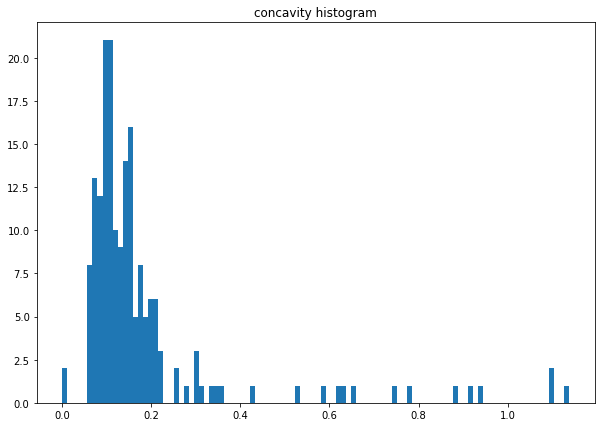

In [ ]:
fig = plt.figure(figsize =(10, 7))
 
plt.hist(df['concavity'], bins = 100)
plt.title("concavity histogram")
plt.show()

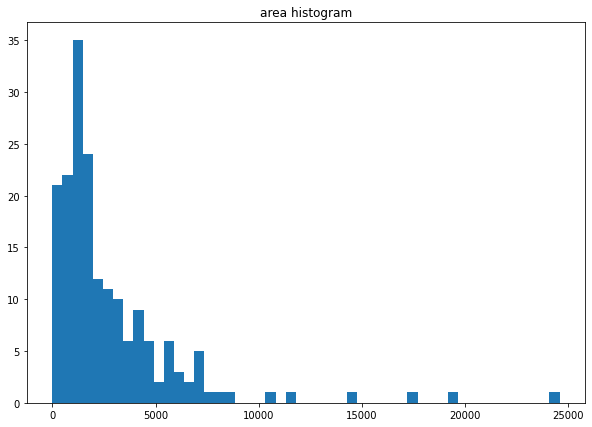

In [ ]:
fig = plt.figure(figsize =(10, 7))
 
plt.hist(df['area'], bins = 50)
plt.title("area histogram")
plt.show()

In [ ]:
df.drop(df.index[(df['concavity'] > conc_thresh)], axis=0, inplace=True)
df.drop(df.index[(df['area'] > area_thresh)], axis=0, inplace=True)
df.drop(df.index[(df['perimeter'] <= 0)], axis=0, inplace=True)
df.drop(df.index[(df['major_axis_length'] <= 0)], axis=0, inplace=True)
df.drop(df.index[(df['minor_axis_length'] <= 0)], axis=0, inplace=True)

In [ ]:
df

,area,equivalent_diameter,mean_intensity-0,orientation,perimeter,max_intensity-0,min_intensity-0,major_axis_length,minor_axis_length,concavity,...,ResNet152_320_mean,ResNet152_320_var,InceptionV3_160_mean,InceptionV3_160_var,InceptionV3_320_mean,InceptionV3_320_var,DenseNet201_160_mean,DenseNet201_160_var,DenseNet201_320_mean,DenseNet201_320_var
1,648,28.723844,80.836420,-1.253000,137.775649,115,43,41.142632,25.852384,0.212617,...,15.011798,5.836187,27.465602,4.330046,5.143257,0.075482,11.772095,0.766149,7.408242,0.397562
3,964,35.034311,63.024896,1.297141,152.953319,108,25,39.964563,33.485527,0.158665,...,12.883651,2.913057,29.934190,6.125023,7.839539,0.394314,6.073049,1.809406,6.591438,0.699225
4,1038,36.354128,72.942197,-1.096501,160.882251,110,43,49.042938,31.678520,0.154993,...,9.799105,1.336981,38.177765,25.421113,10.182240,0.833182,8.394682,0.259655,7.186593,0.072373
5,2764,59.323133,81.939942,1.235116,408.960461,114,44,85.134802,63.849064,0.147960,...,9.494663,6.663058,36.651214,31.009249,10.932244,7.205410,6.490096,1.939286,5.450367,0.864699
8,2210,53.045824,59.921719,-1.128487,245.800036,106,27,77.657187,38.607311,0.111222,...,10.553995,7.895867,34.708056,64.232753,5.801344,1.137781,8.545245,1.722915,7.310563,1.441534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,4144,72.638176,69.813465,-1.279733,421.232539,115,32,113.083583,55.481008,0.101649,...,14.390427,9.255333,48.268649,32.331260,9.010192,0.457557,9.328161,3.238487,6.157896,2.166839
180,1664,46.029019,69.373798,-1.067999,233.871104,108,36,65.750613,36.651962,0.140548,...,16.527083,0.961591,52.589060,14.669964,7.524545,1.415429,13.419993,2.442087,6.667549,0.514593
181,3401,65.804921,69.565716,-1.452130,318.628463,112,31,106.262101,42.873203,0.093687,...,19.548899,24.169921,43.802486,12.299848,8.207186,3.228202,12.015694,6.369136,8.824968,3.068560
182,1056,36.667983,79.820076,-1.434093,181.225397,106,45,67.456013,21.438550,0.171615,...,14.895533,5.496276,44.736919,10.693926,5.841589,0.130637,11.387465,2.742717,5.929907,0.623289


In [ ]:
name

In [ ]:
df.to_excel(f'/content/drive/MyDrive/BTP/Result- Part-2/Statistics with activations/{name}.xls', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
